# Diving deeper into the BRFSS dataset

In [2]:
library(tidyverse)
library(ggplot2)

In [3]:
brfss_table = read.table('../../Table/BRFSS/BRFSS_cleaned_master.tsv', 
    stringsAsFactors = F, sep = '\t', header = T)
head(brfss_table)
dim(brfss_table)

,mmsa,age,income,exercise,flushot,binging,heavy_drink,smoker,smoking_now,year,state,hpi
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
1,10740,1,3,1,NA,2,1,1,2,2003,NM,120.21
2,10740,1,2,1,NA,2,1,3,1,2003,NM,120.21
3,10740,1,4,1,NA,2,1,2,2,2003,NM,120.21
4,10740,1,5,1,NA,1,1,1,2,2003,NM,120.21
5,10740,1,3,1,NA,1,1,4,1,2003,NM,120.21
6,10740,1,2,1,NA,1,1,4,1,2003,NM,120.21


[1] 2574386      12

In [4]:
# some basic stats on each column - we have 3 range variables and 5 binary variables
length(unique(brfss_table$mmsa)) # data available from 265 MSA's
unique(brfss_table$age) # range (1 to 14)
unique(brfss_table$income) # range (1 to 5)
unique(brfss_table$exercise) # binary (1 or 2)
unique(brfss_table$flushot) # binary (1 or 2)
unique(brfss_table$binging) # binary (1 or 2)
unique(brfss_table$heavy_drink) # binary (1 or 2)
unique(brfss_table$smoker) # range (1 to 4)
unique(brfss_table$smoking_now) # binary (1 or 2)
unique(brfss_table$year) # years 2003 to 2019, but some gaps in between, including 4 years between 2008 and 2013

[1] 265

[1]  1  2  3  4  5 14  6  7  8  9 10 11 12 13

[1] 3 2 4 5 9 1

[1] 1 2 9

[1] NA  9  2  1

[1] 2 1 9

[1] 1 2 9

[1] 1 3 2 4 9

[1] 2 1 9

[1] 2003 2004 2005 2006 2008 2013 2014 2015 2016 2017 2018 2019

## Question: does income play a role in behavioral risk factors?

In [8]:
# 1 - exercise
tbl = brfss_table %>% filter(exercise < 9, income < 9)
summary(lm(exercise ~ income, data = tbl))
# 2- flushot
tbl = brfss_table %>% filter(flushot < 9, income < 9)
summary(lm(flushot ~ income, data = tbl))
# 3 - binging
tbl = brfss_table %>% filter(binging < 9, income < 9)
summary(lm(binging ~ income, data = tbl))
# 4 - heavy_drink
tbl = brfss_table %>% filter(heavy_drink < 9, income < 9)
summary(lm(heavy_drink ~ income, data = tbl))
# 5 - smoker
tbl = brfss_table %>% filter(smoker < 9, income < 9)
summary(lm(smoker ~ income, data = tbl))
# 6 - smoking_now
tbl = brfss_table %>% filter(smoking_now < 9, income < 9)
summary(lm(smoking_now ~ income, data = tbl))


Call:
lm(formula = exercise ~ income, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4265 -0.2238 -0.1562 -0.1562  0.8438 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4941135  0.0008073  1850.7   <2e-16 ***
income      -0.0675884  0.0001990  -339.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4144 on 2127443 degrees of freedom
Multiple R-squared:  0.05145,	Adjusted R-squared:  0.05145 
F-statistic: 1.154e+05 on 1 and 2127443 DF,  p-value: < 2.2e-16



Call:
lm(formula = flushot ~ income, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4115 -0.3677 -0.3239  0.6104  0.6761 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.4333783  0.0016341  877.15   <2e-16 ***
income      -0.0219017  0.0004373  -50.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4783 on 576488 degrees of freedom
Multiple R-squared:  0.004332,	Adjusted R-squared:  0.00433 
F-statistic:  2508 on 1 and 576488 DF,  p-value: < 2.2e-16



Call:
lm(formula = binging ~ income, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1573 -0.1573 -0.1405 -0.1068  0.9100 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.0731944  0.0006731  1594.3   <2e-16 ***
income      0.0168165  0.0001658   101.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3431 on 2102283 degrees of freedom
Multiple R-squared:  0.004869,	Adjusted R-squared:  0.004868 
F-statistic: 1.029e+04 on 1 and 2102283 DF,  p-value: < 2.2e-16



Call:
lm(formula = heavy_drink ~ income, data = tbl)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06644 -0.06644 -0.05935 -0.04515  0.96195 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.0309558  0.0004583 2249.59   <2e-16 ***
income      0.0070975  0.0001129   62.88   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2334 on 2099441 degrees of freedom
Multiple R-squared:  0.00188,	Adjusted R-squared:  0.001879 
F-statistic:  3954 on 1 and 2099441 DF,  p-value: < 2.2e-16



Call:
lm(formula = smoker ~ income, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4143 -0.4143  0.5857  0.6937  1.0178 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.8741625  0.0018951  1516.6   <2e-16 ***
income      0.1080285  0.0004672   231.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.975 on 2133966 degrees of freedom
Multiple R-squared:  0.02444,	Adjusted R-squared:  0.02444 
F-statistic: 5.347e+04 on 1 and 2133966 DF,  p-value: < 2.2e-16



Call:
lm(formula = smoking_now ~ income, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2750 -0.1917 -0.1084 -0.1084  0.8916 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.3166116  0.0007004  1879.8   <2e-16 ***
income      -0.0416485  0.0001727  -241.2   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3603 on 2133966 degrees of freedom
Multiple R-squared:  0.02654,	Adjusted R-squared:  0.02654 
F-statistic: 5.818e+04 on 1 and 2133966 DF,  p-value: < 2.2e-16


summary from linear regression studies - beta means effect sizes:
- higher income means more exercise (negative beta)
- higher income means more flu vaccination (negative beta)
- higher income means more binging and heavy drinking (positive beta)
- higher income means less smoking (positive beta) and higher chance of quitting (negative beta)

### Higher income affects exercise, vaccination and smoking positively, but affects drinking negatively.

### Example visualization: income and smoking

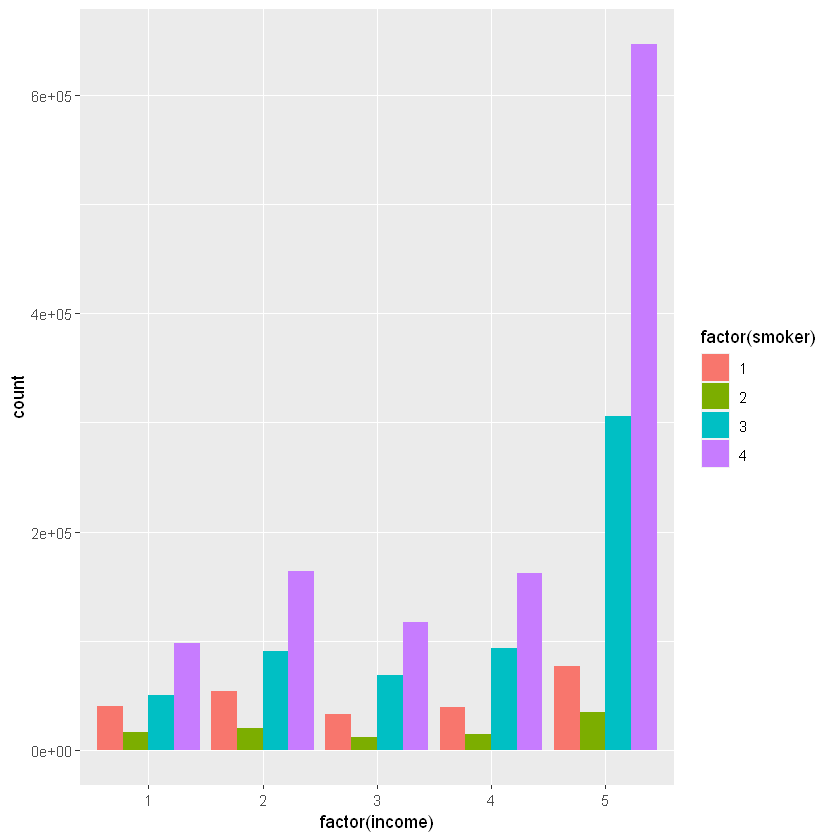

In [34]:
options(repr.plot.width=8, repr.plot.height=4)
# plot total number of reports by category
cols_eval = c('income', 'smoker')
plot_df = brfss_table %>% filter(smoker < 9, income < 9)
ggplot(plot_df, aes(x = factor(income), fill = factor(smoker))) + geom_bar(position = 'dodge')

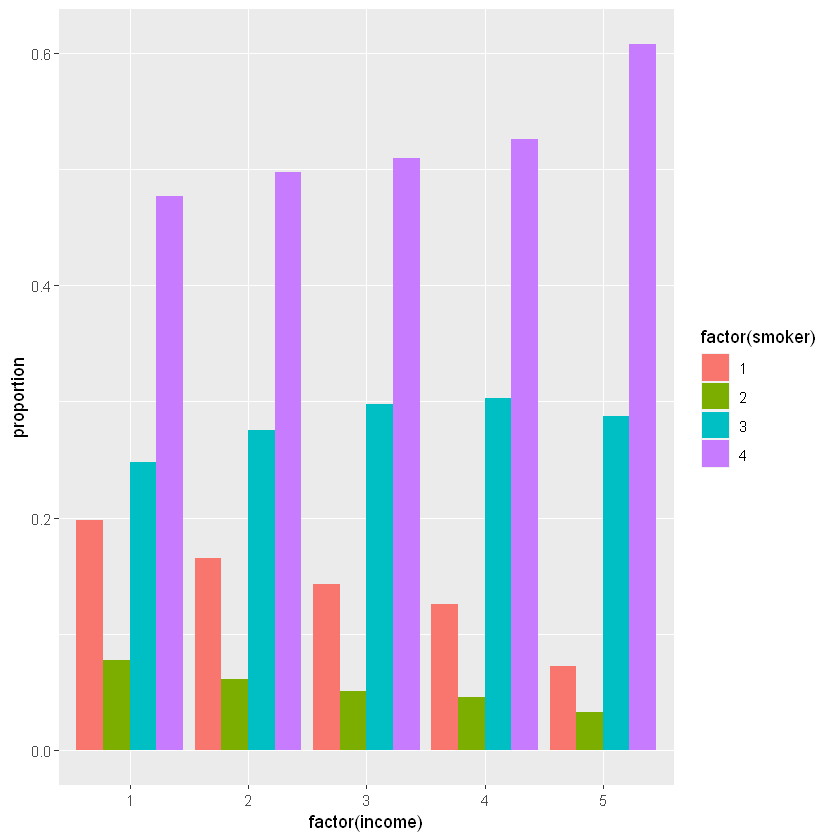

In [39]:
# also plot proportions for each income bracket:
plot_list = list()
counts_df = plot_df %>% count(income)
for (i in c(1:4)) {
    plot_list[[i]] = data.frame(income = c(1:5), smoker = i,
        proportion = sapply(c(1:5), function(x) {nrow(plot_df %>% filter(income == x, smoker == i))}) / counts_df$n
    )
}
proportion_plot_df = do.call('rbind', plot_list)

ggplot(proportion_plot_df, aes(x = factor(income), y = proportion, fill = factor(smoker))) + geom_bar(position = 'dodge', stat = 'identity')

### Conclusion: this plot shows the protective effect of income on smoking: > 60% of people with incomes over 50,000 USD say they have never smoked (smoker = 4). Meanwhile, close to 20% of people with incomes less than 15,000 USD say they are daily smokers (smoker = 1).

## Question: are Americans engaging in more healthy behaviors over time?

In [7]:
# 1 - exercise
tbl = brfss_table %>% filter(exercise < 9)
summary(lm(exercise ~ year, data = tbl))
# 2- flushot
tbl = brfss_table %>% filter(flushot < 9)
summary(lm(flushot ~ year, data = tbl))
# 3 - binging
tbl = brfss_table %>% filter(binging < 9)
summary(lm(binging ~ year, data = tbl))
# 4 - heavy_drink
tbl = brfss_table %>% filter(heavy_drink < 9)
summary(lm(heavy_drink ~ year, data = tbl))
# 5 - smoker
tbl = brfss_table %>% filter(smoker < 9)
summary(lm(smoker ~ year, data = tbl))
# 6 - smoking_now
tbl = brfss_table %>% filter(smoking_now < 9)
summary(lm(smoking_now ~ year, data = tbl))


Call:
lm(formula = exercise ~ year, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.2489 -0.2471 -0.2422 -0.2392  0.7608 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.039e-02  1.020e-01     0.2    0.842    
year        6.085e-04  5.071e-05    12.0   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4299 on 2502972 degrees of freedom
Multiple R-squared:  5.752e-05,	Adjusted R-squared:  5.712e-05 
F-statistic:   144 on 1 and 2502972 DF,  p-value: < 2.2e-16



Call:
lm(formula = flushot ~ year, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3930 -0.3706 -0.3202  0.6182  0.6965 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.9002675  0.2236880  -44.26   <2e-16 ***
year         0.0055935  0.0001111   50.33   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4787 on 723917 degrees of freedom
Multiple R-squared:  0.003487,	Adjusted R-squared:  0.003486 
F-statistic:  2533 on 1 and 723917 DF,  p-value: < 2.2e-16



Call:
lm(formula = binging ~ year, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1378 -0.1336 -0.1295 -0.1186  0.8842 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.629e+00  8.009e-02  -20.34   <2e-16 ***
year         1.370e-03  3.981e-05   34.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3342 on 2454529 degrees of freedom
Multiple R-squared:  0.0004825,	Adjusted R-squared:  0.0004821 
F-statistic:  1185 on 1 and 2454529 DF,  p-value: < 2.2e-16



Call:
lm(formula = heavy_drink ~ year, data = tbl)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06037 -0.05795 -0.05553 -0.04988  0.95254 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.690e-01  5.455e-02  -10.43   <2e-16 ***
year         8.070e-04  2.711e-05   29.76   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2274 on 2449879 degrees of freedom
Multiple R-squared:  0.0003615,	Adjusted R-squared:  0.0003611 
F-statistic: 885.9 on 1 and 2449879 DF,  p-value: < 2.2e-16



Call:
lm(formula = smoker ~ year, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3925 -0.3526  0.6208  0.6873  0.8203 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.345e+01  2.319e-01  -101.1   <2e-16 ***
year         1.330e-02  1.152e-04   115.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9753 on 2500728 degrees of freedom
Multiple R-squared:  0.005294,	Adjusted R-squared:  0.005294 
F-statistic: 1.331e+04 on 1 and 2500728 DF,  p-value: < 2.2e-16



Call:
lm(formula = smoking_now ~ year, data = tbl)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.1948 -0.1720 -0.1401 -0.1264  0.8782 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.3304576  0.0855217   120.8   <2e-16 ***
year        -0.0045610  0.0000425  -107.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3597 on 2500728 degrees of freedom
Multiple R-squared:  0.004583,	Adjusted R-squared:  0.004583 
F-statistic: 1.151e+04 on 1 and 2500728 DF,  p-value: < 2.2e-16


summary from linear regression studies - beta means effect sizes:
- over time, Americans are getting less exercise (positive beta)
- over time, Americans are getting less flu vaccination (positive beta)
- over time, Americans are doing more binging and heavy drinking (positive beta)
- over time, Americans are smoking less (positive beta) and has higher chance of quitting (negative beta)

### Over time, Americans are smoking less, but drinking more and getting exercise and vaccinations less.

Focusing on drinking behavior, either Americans are binging more and are becoming heavier drinkers, or these behaviors simply being reported in higher frequency. Before we go into causal analysis, let's actually see what is going on:

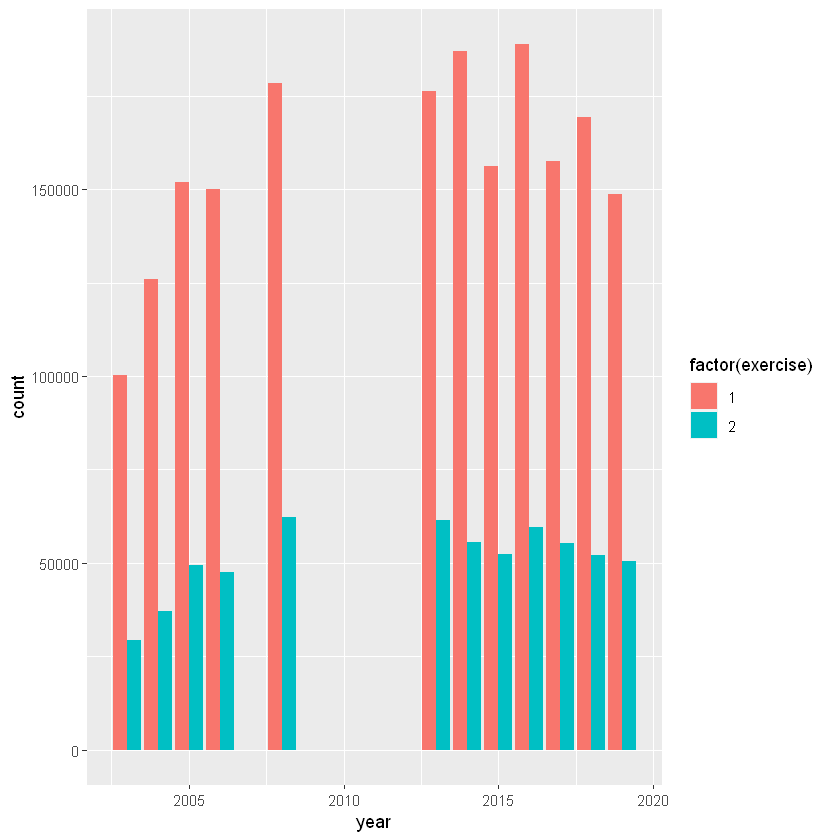

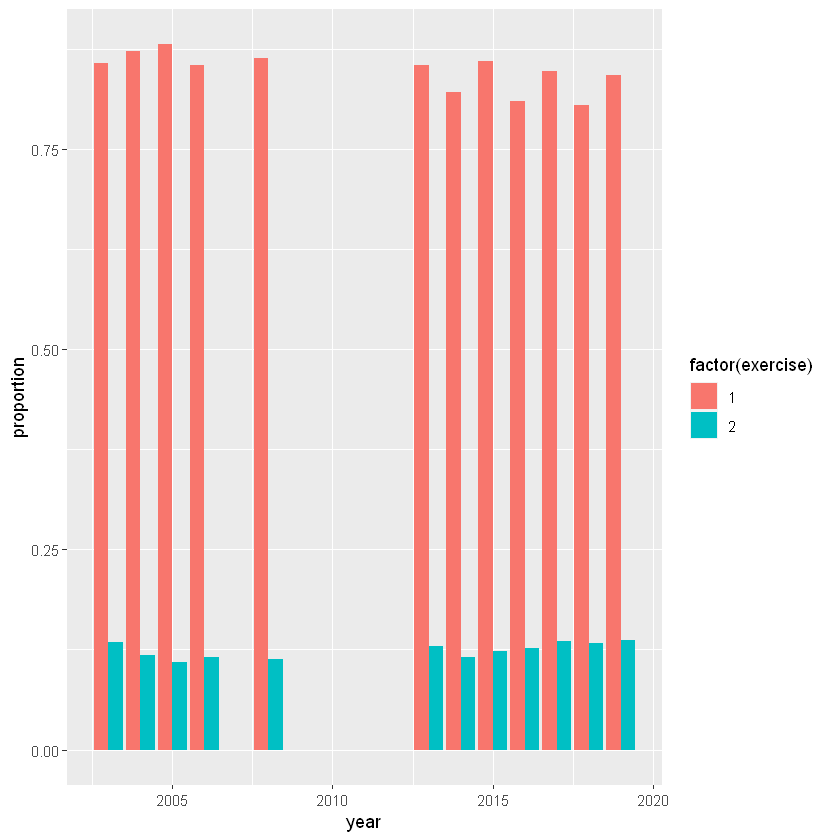

In [47]:
# Let's look at exercise first
cols_eval = c('year', 'exercise')
plot_df = brfss_table %>% filter(exercise < 9)
ggplot(plot_df, aes(x = year, fill = factor(exercise))) + geom_bar(position = 'dodge')

plot_list = list()
counts_df = plot_df %>% count(year)
for (i in c(1:2)) {
    plot_list[[i]] = data.frame(year = counts_df$year, exercise = i,
        proportion = sapply(counts_df$year, function(x) {nrow(plot_df %>% filter(year == x, binging == i))}) / counts_df$n
    )
}
proportion_plot_df = do.call('rbind', plot_list)

ggplot(proportion_plot_df, aes(x = year, y = proportion, fill = factor(exercise))) + geom_bar(position = 'dodge', stat = 'identity')

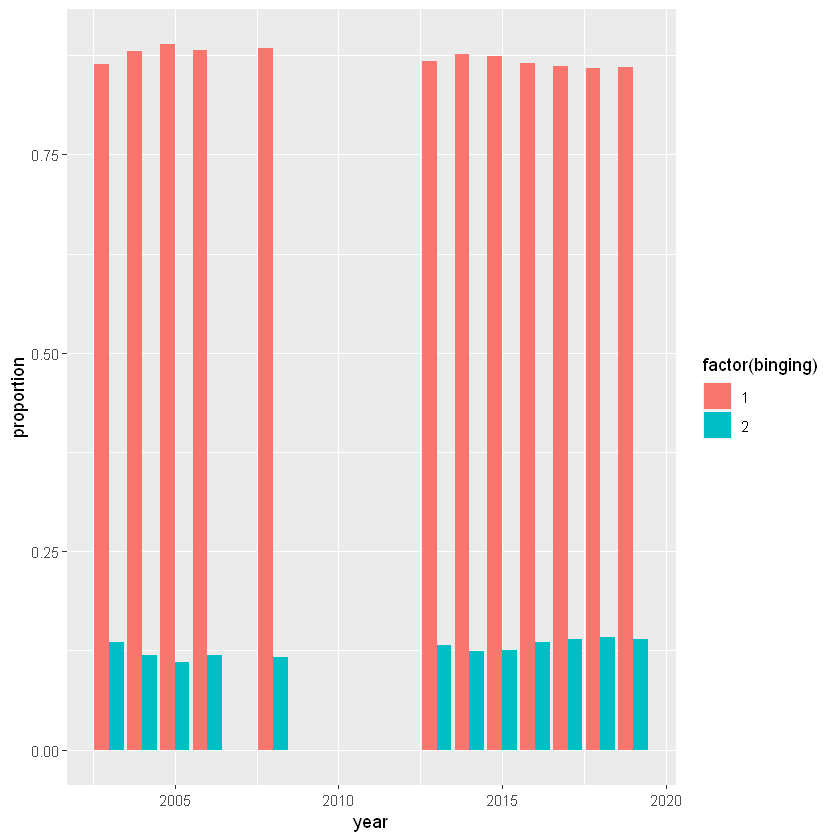

In [57]:
# Let's also look at binging
cols_eval = c('year', 'binging')
plot_df = brfss_table %>% filter(binging < 9)
# ggplot(plot_df, aes(x = year, fill = factor(binging))) + geom_bar(position = 'dodge')
plot_list = list()
counts_df = plot_df %>% count(year)
for (i in c(1:2)) {
    plot_list[[i]] = data.frame(year = counts_df$year, binging = i,
        proportion = sapply(counts_df$year, function(x) {nrow(plot_df %>% filter(year == x, binging == i))}) / counts_df$n
    )
}
proportion_plot_df = do.call('rbind', plot_list)
ggplot(proportion_plot_df, aes(x = year, y = proportion, fill = factor(binging))) + geom_bar(position = 'dodge', stat = 'identity')

In [58]:
tail(proportion_plot_df)

,year,binging,proportion
,<int>,<int>,<dbl>
19,2014,2,0.1238323
20,2015,2,0.1256734
21,2016,2,0.1355804
22,2017,2,0.1388585
23,2018,2,0.1413872
24,2019,2,0.1398778


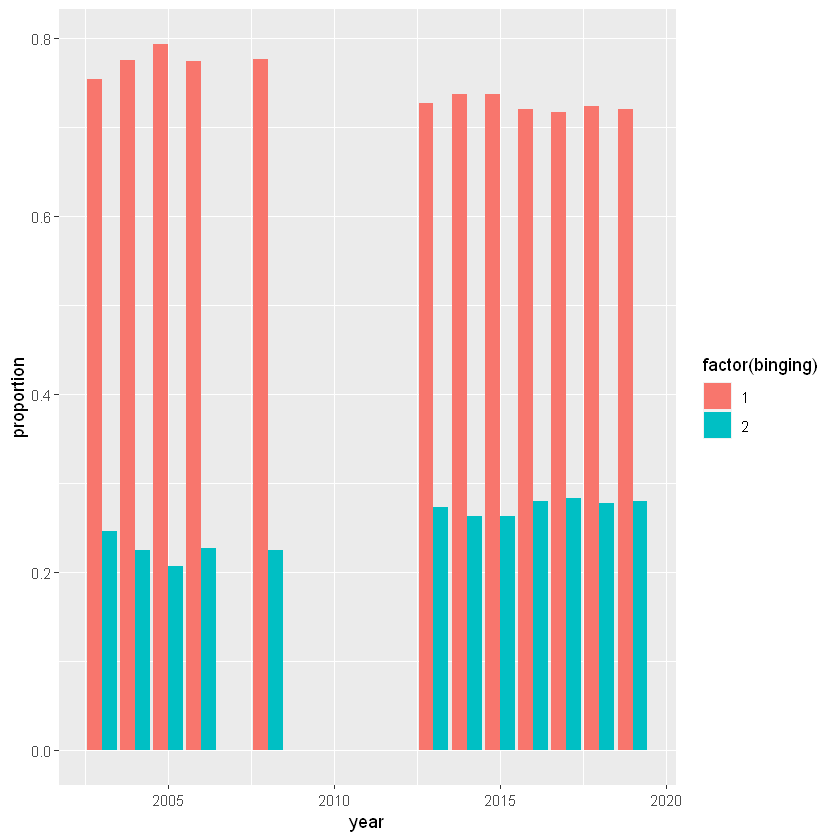

In [59]:
# However, perhaps the problem of binging is more pronounced among the younger population - let's test this theory
# AGEG5YR of 1-3 corresponds to ages 18 to 34

# Let's also look at binging
cols_eval = c('year', 'binging')
plot_df = brfss_table %>% filter(binging < 9, age < 4)
# ggplot(plot_df, aes(x = year, fill = factor(binging))) + geom_bar(position = 'dodge')
plot_list = list()
counts_df = plot_df %>% count(year)
for (i in c(1:2)) {
    plot_list[[i]] = data.frame(year = counts_df$year, binging = i,
        proportion = sapply(counts_df$year, function(x) {nrow(plot_df %>% filter(year == x, binging == i))}) / counts_df$n
    )
}
proportion_plot_df = do.call('rbind', plot_list)
ggplot(proportion_plot_df, aes(x = year, y = proportion, fill = factor(binging))) + geom_bar(position = 'dodge', stat = 'identity')

In [61]:
tail(proportion_plot_df)

,year,binging,proportion
,<int>,<int>,<dbl>
19,2014,2,0.2630889
20,2015,2,0.2626386
21,2016,2,0.2798982
22,2017,2,0.2833917
23,2018,2,0.2768502
24,2019,2,0.2794184


### Conclusion: By looking at these plots we can observe how Americans are exercising less, and binging more over the time period of 2003 to 2019. When it comes to binging, the problem is more pronounced in the younger age group as expected, where prevalence is almost double the general population (28% compared to 14% in 2019). 

## Question: are there certain metro areas more prone to specific behavioral risks?

For this, I'm going to focus on vaccination, and take into account actual metro areas

In [64]:
sub_tbl = brfss_table %>% drop_na(flushot) %>% filter(flushot < 9)
dim(sub_tbl)
length(unique(sub_tbl$mmsa))

[1] 723919     12

[1] 265

In [86]:
# Let's filter out MSAs with low counts:
count_df = sub_tbl %>% count(mmsa) %>% arrange(desc(n))
# We're going to require at least 1500 responses
count_df = count_df %>% filter(n >= 1500)
tail(count_df)

,mmsa,n
,<int>,<int>
124,36500,1571
125,24660,1550
126,28940,1542
127,19804,1531
128,13644,1525
129,19660,1519


In [87]:
# let's rank these 129 metro areas by proportion reporting vaccinated (over the whole period)
get_proportion = function(city) {
    tbl_top = c(nrow(sub_tbl %>% filter(flushot == 1, mmsa == city)),
               nrow(sub_tbl %>% filter(flushot == 2, mmsa == city)))
    return(tbl_top[1] / sum(tbl_top))
}

count_df$proportion = sapply(count_df$mmsa, function(x) {get_proportion(x)})

In [88]:
count_df = count_df %>% arrange(desc(proportion))
head(count_df, 10)
tail(count_df, 10)

,mmsa,n,proportion
,<int>,<int>,<dbl>
1,26180,2761,0.7566099
2,13644,1525,0.7377049
3,39580,1635,0.7333333
4,43620,4119,0.7314882
5,46140,6864,0.7218823
6,16620,2882,0.7210271
7,14484,2684,0.7205663
8,14860,2192,0.7189781
9,36420,7529,0.7072652


,mmsa,n,proportion
,<int>,<int>,<dbl>
120,36740,4175,0.5810778
121,35614,13046,0.5785681
122,21340,1664,0.5775240
123,19660,1519,0.5773535
124,10580,2452,0.5758564
125,16980,12180,0.5692939
126,40140,2567,0.5633035
127,33100,6010,0.5449251
128,11260,2220,0.5436937


- Highest rank: 26180 - Honolulu, HI
- Lowest rank: 41980 - San Juan, Puerto Rico

It's interesting to see neither place is in the contiguous US.

Getting a nice geographical plot for MSA will be one of my goals, but plotting state level is definitely easier - this is what I will showcase for this portion:

In [127]:
# Now we're aggregating at state-level
count_df = sub_tbl %>% count(state)
# We're going to require at least 1500 responses
# let's rank these 129 metro areas by proportion reporting vaccinated (over the whole period)
get_proportion = function(st) {
    tbl_top = c(nrow(sub_tbl %>% filter(flushot == 1, state == st)),
               nrow(sub_tbl %>% filter(flushot == 2, state == st)))
    return(tbl_top[1] / sum(tbl_top))
}
count_df$proportion = sapply(count_df$state, function(x) {get_proportion(x)})

In [133]:
library(maps)
us_states <- map_data("state")
head(us_states)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


In [134]:
# The HPI_master table has mapping from two-letter state to state name
hpi_table = read.csv('../../Data/HPI_master.csv')
hpi_table = hpi_table %>% filter(level == 'State') %>% distinct(place_id, .keep_all = T)
hpi_table$region = tolower(hpi_table$place_name)
hpi_table$state = hpi_table$place_id
us_states = us_states %>% left_join(hpi_table[, c('region', 'state')], by = 'region')
head(us_states)

,long,lat,group,order,region,subregion,state
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<fct>
1,-87.46201,30.38968,1,1,alabama,NA,AL
2,-87.48493,30.37249,1,2,alabama,NA,AL
3,-87.52503,30.37249,1,3,alabama,NA,AL
4,-87.53076,30.33239,1,4,alabama,NA,AL
5,-87.57087,30.32665,1,5,alabama,NA,AL
6,-87.58806,30.32665,1,6,alabama,NA,AL


In [135]:
us_states_vax_data = us_states %>% left_join(count_df, by = 'state')
head(us_states_vax_data)

,long,lat,group,order,region,subregion,state,n,proportion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>
1,-87.46201,30.38968,1,1,alabama,NA,AL,6226,0.6378092
2,-87.48493,30.37249,1,2,alabama,NA,AL,6226,0.6378092
3,-87.52503,30.37249,1,3,alabama,NA,AL,6226,0.6378092
4,-87.53076,30.33239,1,4,alabama,NA,AL,6226,0.6378092
5,-87.57087,30.32665,1,5,alabama,NA,AL,6226,0.6378092
6,-87.58806,30.32665,1,6,alabama,NA,AL,6226,0.6378092


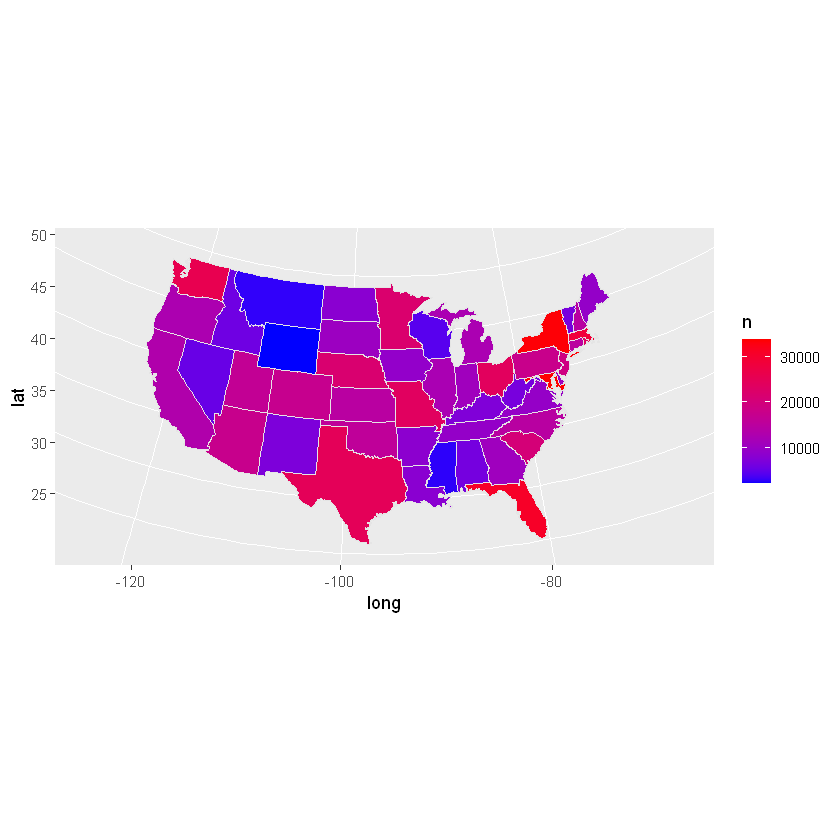

In [142]:
g = ggplot(data = us_states_vax_data, 
        mapping = aes(x = long, y = lat, group = group, fill = n))
g = g + geom_polygon(color = "gray90", size = 0.1) + 
    coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
    scale_fill_gradient(low = 'blue', high = 'red')
g

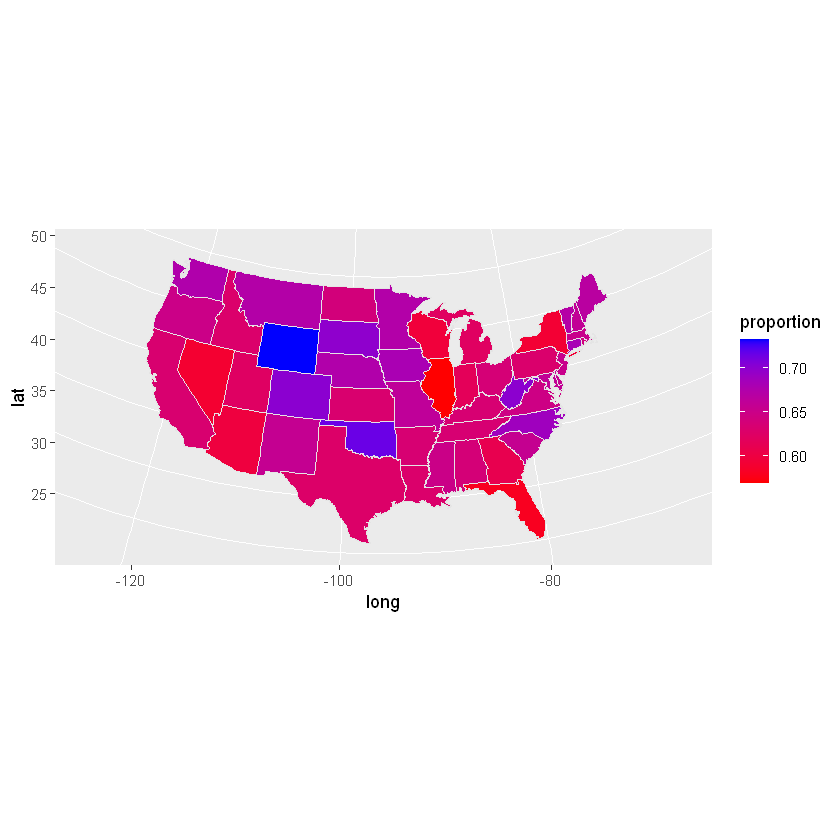

In [143]:
g = ggplot(data = us_states_vax_data, 
        mapping = aes(x = long, y = lat, group = group, fill = proportion))
g = g + geom_polygon(color = "gray90", size = 0.1) + 
    coord_map(projection = "albers", lat0 = 39, lat1 = 45) +
    scale_fill_gradient(low = 'red', high = 'blue')
g

It looks like in general, states with a larger population are doing more poorly in vaccinations in urban areas.

It also looks like there is a good correspondance between number of responses and vaccination proportions in general, although this hypothesis would need to be studied further. It is worth noting that these are not based on state-wide population, but from urban/suburban regions from each state that belongs to an MSA, so the representation is a bit different.

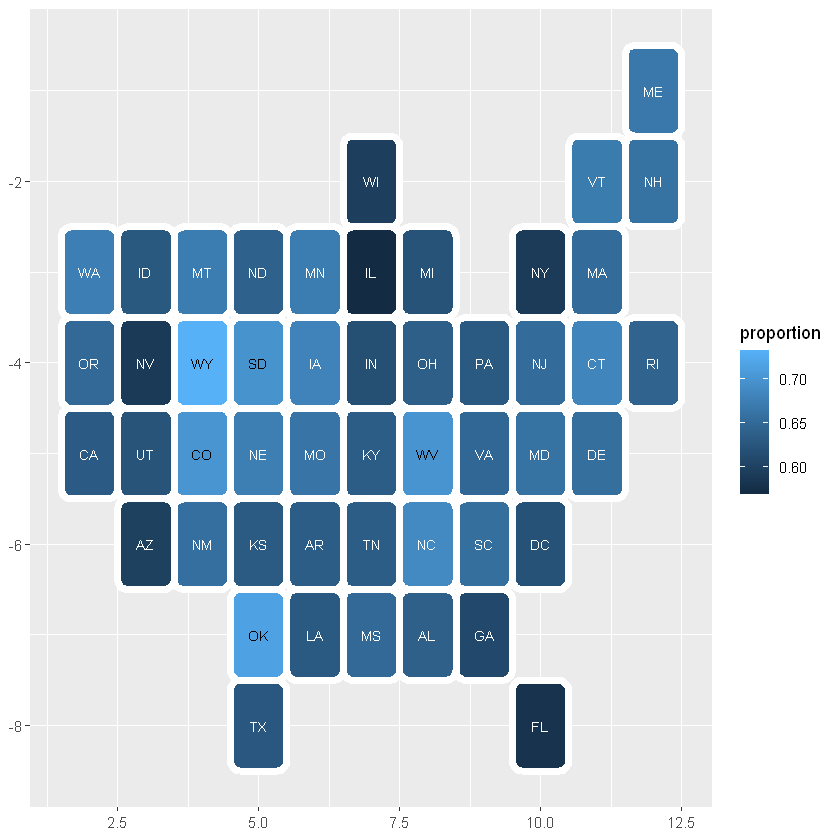

In [146]:
# We can also plot state bins:
library(statebins)

g = ggplot(data = us_states_vax_data,  aes(state = state, fill = proportion)) + geom_statebins()
g

### Conclusion: I was also able to obtain aggregate data on geographic regions, and make visualizations at state-level. The goals of this project will also include better visualizations for MSA levels as well.